2it [00:00, 15.60it/s]

16:13:51.708 |  ZGI.TO
16:13:51.791 |  ZCN.TO
16:13:51.838 |  STPL.TO
16:13:51.893 |  ZIU.TO


6it [00:00, 18.31it/s]

16:13:51.943 |  COMM.TO
16:13:51.997 |  ZDM.TO
16:13:52.045 |  DISC.TO
16:13:52.088 |  ZEA.TO
16:13:52.134 |  ZEO.TO


11it [00:00, 19.56it/s]

16:13:52.186 |  ZEM.TO
16:13:52.243 |  ZGD.TO
16:13:52.289 |  ZUE.TO
16:13:52.341 |  ZJG.TO
16:13:52.382 |  ZSP.TO


14it [00:00, 20.17it/s]

16:13:52.431 |  ZEAT.TO
16:13:52.484 |  ZSP.U.TO


19it [00:05,  2.34it/s]

16:13:56.653 |  ZMT.TO
16:13:56.706 |  ZDJ.TO
16:13:56.765 |  ZQQ.TO
16:13:56.825 |  ESGA.TO


22it [00:05,  3.44it/s]

16:13:56.870 |  ZNQ.TO
16:13:56.919 |  ESGY.TO
16:13:56.962 |  ZNQ.U.TO


24it [00:08,  1.51it/s]

16:14:00.424 |  ESGE.TO
16:14:00.462 |  ZMID.F.TO


$ZMID.F.TO: possibly delisted; no timezone found
26it [00:12,  1.00s/it]

16:14:04.302 |  ESGG.TO
16:14:04.351 |  ZMID.TO
16:14:04.392 |  ZGRN.TO
16:14:04.432 |  ZMID.U.TO


$ZMID.U.TO: possibly delisted; no timezone found
29it [00:13,  1.35it/s]

16:14:05.187 |  ZCLN.TO
16:14:05.236 |  ZSML.F.TO


$ZSML.F.TO: possibly delisted; no timezone found
34it [00:16,  1.61it/s]

16:14:08.216 |  ESGB.TO
16:14:08.259 |  ZSML.TO
16:14:08.295 |  ESGF.TO
16:14:08.340 |  ZSML.U.TO


$ZSML.U.TO: possibly delisted; no timezone found
36it [00:17,  1.80it/s]

16:14:08.996 |  ZJPN.TO
16:14:09.078 |  ZJPN.F.TO


$ZJPN.F.TO: possibly delisted; no timezone found
37it [00:20,  1.10it/s]

16:14:11.914 |  ZCS.TO
16:14:11.965 |  ZID.TO
16:14:12.007 |  ZCS.L.TO


$ZCS.L.TO: possibly delisted; no timezone found
43it [00:21,  2.30it/s]

16:14:12.741 |  ZCH.TO
16:14:12.793 |  ZCM.TO
16:14:12.832 |  ZLC.TO
16:14:12.871 |  ZLB.TO
16:14:12.914 |  ZPS.TO


46it [00:21,  3.32it/s]

16:14:12.954 |  ZLH.TO
16:14:12.995 |  ZPS.L.TO


$ZPS.L.TO: possibly delisted; no timezone found
48it [00:25,  1.39it/s]

16:14:16.976 |  ZLU.TO
16:14:17.028 |  ZFS.TO
16:14:17.071 |  ZLU.U.TO


$ZLU.U.TO: possibly delisted; no timezone found
50it [00:25,  1.63it/s]

16:14:17.651 |  ZFS.L.TO


$ZFS.L.TO: possibly delisted; no timezone found
53it [00:28,  1.50it/s]

16:14:20.360 |  ZLD.TO
16:14:20.417 |  ZMP.TO
16:14:20.463 |  ZLI.TO
16:14:20.510 |  ZPL.TO
16:14:20.551 |  ZLE.TO


56it [00:28,  2.38it/s]

16:14:20.598 |  ZFM.TO
16:14:20.649 |  ZUQ.F.TO


$ZUQ.F.TO: possibly delisted; no timezone found
60it [00:29,  3.34it/s]

16:14:21.259 |  ZFL.TO
16:14:21.320 |  ZUQ.TO
16:14:21.368 |  ZUQ.U.TO


$ZUQ.U.TO: possibly delisted; no timezone found
64it [00:32,  2.47it/s]

16:14:23.643 |  ZAG.TO
16:14:23.711 |  ZGQ.TO
16:14:23.764 |  ZSB.TO
16:14:23.815 |  ZEQ.TO


69it [00:36,  1.80it/s]

16:14:27.810 |  ZCB.TO
16:14:27.853 |  ZDV.TO
16:14:27.906 |  ZDB.TO
16:14:27.946 |  ZUD.TO
16:14:27.985 |  ZSDB.TO


72it [00:36,  2.68it/s]

16:14:28.025 |  ZDY.TO
16:14:28.070 |  ZCDB.TO
16:14:28.111 |  ZDY.U.TO


$ZDY.U.TO: possibly delisted; no timezone found
77it [00:37,  4.05it/s]

16:14:28.667 |  ZMMK.TO
16:14:28.717 |  ZDH.TO
16:14:28.761 |  ZST.TO
16:14:28.809 |  ZDI.TO
16:14:28.857 |  ZST.L.TO


$ZST.L.TO: possibly delisted; no timezone found
79it [00:39,  1.92it/s]

16:14:31.431 |  ZVC.TO
16:14:31.529 |  ZMBS.TO


81it [00:40,  2.41it/s]

16:14:31.665 |  ZVU.TO
16:14:31.768 |  ZGB.TO
16:14:31.851 |  ZRR.TO


83it [00:40,  3.04it/s]

16:14:31.973 |  ZOCT.TO


$ZOCT.TO: possibly delisted; no timezone found
84it [00:40,  2.67it/s]

16:14:32.577 |  ZBI.TO
16:14:32.632 |  ZJUL.TO


$ZJUL.TO: possibly delisted; no timezone found
87it [00:43,  1.89it/s]

16:14:34.802 |  ZBBB.TO
16:14:34.977 |  ZAPR.TO


$ZAPR.TO: possibly delisted; no timezone found
88it [00:44,  1.63it/s]

16:14:35.911 |  ZQB.TO
16:14:35.954 |  ZJAN.TO


$ZJAN.TO: possibly delisted; no timezone found
90it [00:46,  1.16it/s]

16:14:38.468 |  ZUAG.TO
16:14:38.514 |  ZWC.TO
16:14:38.557 |  ZUAG.F.TO


$ZUAG.F.TO: possibly delisted; no timezone found
93it [00:47,  1.73it/s]

16:14:39.136 |  ZWS.TO
16:14:39.191 |  ZUAG.U.TO


$ZUAG.U.TO: possibly delisted; no timezone found
97it [00:49,  1.82it/s]

16:14:41.500 |  ZWH.TO
16:14:41.566 |  ZSU.TO
16:14:41.617 |  ZWH.U.TO


$ZWH.U.TO: possibly delisted; no timezone found
100it [00:50,  2.59it/s]

16:14:42.195 |  ZMU.TO
16:14:42.251 |  ZWA.TO
16:14:42.298 |  ZIC.TO
16:14:42.350 |  ZWE.TO


102it [00:50,  3.58it/s]

16:14:42.410 |  ZIC.U.TO


$ZIC.U.TO: possibly delisted; no timezone found


16:14:44.511 |  ZWP.TO


106it [00:55,  1.58it/s]

16:14:46.860 |  ZUCM.TO
16:14:46.913 |  ZWG.TO
16:14:46.961 |  ZUCM.U.TO


$ZUCM.U.TO: possibly delisted; no timezone found
108it [00:55,  1.86it/s]

16:14:47.545 |  ZWB.TO
16:14:47.607 |  ZUS.U.TO


$ZUS.U.TO: possibly delisted; no timezone found
109it [00:57,  1.25it/s]

16:14:49.590 |  ZWB.U.TO


$ZWB.U.TO: possibly delisted; no timezone found
110it [00:58,  1.37it/s]

16:14:50.060 |  ZUS.V.TO


$ZUS.V.TO: possibly delisted; no timezone found
111it [01:00,  1.03s/it]

16:14:52.111 |  ZWK.TO
16:14:52.171 |  ZTS.TO


$ZTS.TO: possibly delisted; no timezone found
113it [01:00,  1.36it/s]

16:14:52.681 |  ZWU.TO
16:14:52.735 |  ZTS.U.TO


$ZTS.U.TO: possibly delisted; no timezone found
115it [01:03,  1.16it/s]

16:14:54.848 |  ZWHC.TO
16:14:54.904 |  ZTM.TO


$ZTM.TO: possibly delisted; no timezone found
117it [01:03,  1.48it/s]

16:14:55.472 |  ZWEN.TO
16:14:55.531 |  ZTM.U.TO


$ZTM.U.TO: possibly delisted; no timezone found
119it [01:06,  1.18it/s]

16:14:57.862 |  ZWT.TO
16:14:57.922 |  ZTL.F.TO


$ZTL.F.TO: possibly delisted; no timezone found
121it [01:06,  1.47it/s]

16:14:58.508 |  ZWQT.TO
16:14:58.559 |  ZTL.TO


$ZTL.TO: possibly delisted; no timezone found
123it [01:09,  1.17it/s]

16:15:00.995 |  ZPAY.F.TO


$ZPAY.F.TO: possibly delisted; no timezone found
124it [01:09,  1.21it/s]

16:15:01.697 |  ZTL.U.TO


$ZTL.U.TO: possibly delisted; no timezone found
125it [01:12,  1.14s/it]

16:15:04.045 |  ZPAY.TO
16:15:04.096 |  ZTIP.TO
16:15:04.140 |  ZPAY.U.TO


$ZPAY.U.TO: possibly delisted; no timezone found
128it [01:13,  1.36it/s]

16:15:04.880 |  ZTIP.U.TO


$ZTIP.U.TO: possibly delisted; no timezone found
129it [01:15,  1.12s/it]

16:15:07.701 |  ZPH.TO
16:15:07.761 |  ZTIP.F.TO


$ZTIP.F.TO: possibly delisted; no timezone found
133it [01:16,  1.70it/s]

16:15:08.377 |  ZPW.TO
16:15:08.430 |  ZJK.TO
16:15:08.480 |  ZPW.U.TO


$ZPW.U.TO: possibly delisted; no timezone found
134it [01:19,  1.06it/s]

16:15:10.950 |  ZHY.TO
16:15:11.009 |  ZJK.U.TO


$ZJK.U.TO: possibly delisted; no timezone found
139it [01:20,  2.22it/s]

16:15:11.752 |  ZEB.TO
16:15:11.810 |  ZFH.TO
16:15:11.850 |  ZUT.TO
16:15:11.900 |  ZEF.TO
16:15:11.948 |  ZRE.TO


143it [01:20,  3.79it/s]

16:15:12.001 |  ZIN.TO
16:15:12.119 |  ZPR.TO
16:15:12.190 |  ZUB.TO
16:15:12.251 |  ZPR.U.TO


$ZPR.U.TO: possibly delisted; no timezone found
147it [01:23,  2.50it/s]

16:15:14.632 |  ZBK.TO
16:15:14.691 |  ZHP.TO
16:15:14.738 |  ZUH.TO
16:15:14.790 |  ZUP.TO
16:15:14.835 |  ZHU.TO


150it [01:23,  3.58it/s]

16:15:15.006 |  ZUP.U.TO


$ZUP.U.TO: possibly delisted; no timezone found


16:15:15.693 |  PAGE.TO


$PAGE.TO: possibly delisted; no timezone found
152it [01:26,  1.54it/s]

16:15:18.319 |  Ticker.TO


$TICKER.TO: possibly delisted; no timezone found
153it [01:27,  1.52it/s]

16:15:19.022 |  Date.TO


$DATE.TO: possibly delisted; no timezone found
154it [01:29,  1.00s/it]

16:15:21.509 |  ASSET.TO


$ASSET.TO: possibly delisted; no timezone found
157it [01:30,  1.67it/s]

16:15:22.173 |  ZCON.TO
16:15:22.230 |  ZBAL.TO
16:15:22.277 |  ZGRO.TO
16:15:22.324 |  ZEQT.TO
16:15:22.364 |  ZESG.TO


160it [01:30,  2.83it/s]

16:15:22.423 |  ZBAL.T.TO


$ZBAL.T.TO: possibly delisted; no timezone found


16:15:24.952 |  ZGRO.T.TO


$ZGRO.T.TO: possibly delisted; no timezone found
162it [01:33,  1.39it/s]

16:15:25.586 |  ZMI.TO
16:15:25.646 |  ACTIVE.TO


$ACTIVE.TO: possibly delisted; no timezone found
167it [01:36,  1.71it/s]

16:15:28.465 |  ZLSC.TO
16:15:28.515 |  ZLSU.TO
16:15:28.550 |  ZZZD.TO
16:15:28.591 |  ZACE.TO
16:15:28.632 |  ARKK.TO
16:15:28.668 |  ARKG.TO


170it [01:37,  2.56it/s]

16:15:28.715 |  ARKW.TO
16:15:28.760 |  BGEQ.TO


$BGEQ.TO: possibly delisted; no timezone found
172it [01:37,  2.56it/s]

16:15:29.491 |  BGHC.TO


$BGHC.TO: possibly delisted; no timezone found


16:15:32.014 |  BGIF.TO


$BGIF.TO: possibly delisted; no timezone found
174it [01:40,  1.42it/s]

16:15:32.629 |  BGIN.TO


$BGIN.TO: possibly delisted; no timezone found
175it [01:43,  1.02it/s]

16:15:35.067 |  BGDV.TO


$BGDV.TO: possibly delisted; no timezone found
176it [01:44,  1.04it/s]

16:15:35.927 |  BGRT.TO


$BGRT.TO: possibly delisted; no timezone found
179it [01:50,  1.32s/it]

16:15:42.248 |  GRNI.TO
16:15:42.303 |  TOWR.TO
16:15:42.349 |  WOMN.TO
16:15:42.397 |  ZGSB.TO
16:15:42.438 |  ZMSB.TO


185it [01:50,  2.09it/s]

16:15:42.492 |  ZCPB.TO
16:15:42.544 |  ZFC.TO
16:15:42.586 |  ZFN.TO
16:15:42.633 |  ZXLE.TO
16:15:42.672 |  ZXLU.TO


188it [01:51,  3.09it/s]

16:15:42.713 |  ZXLK.TO
16:15:42.766 |  ZXLB.TO
16:15:42.872 |  ZXLP.TO


192it [01:51,  4.77it/s]

16:15:42.940 |  ZXLY.TO
16:15:43.014 |  ZXLI.TO
16:15:43.059 |  ZXLC.TO
16:15:43.105 |  ZXLV.TO
16:15:43.144 |  ZXLF.TO


195it [01:51,  6.65it/s]

16:15:43.197 |  ZXLR.TO
16:15:43.241 |  ZXLE.F.TO


$ZXLE.F.TO: possibly delisted; no timezone found
197it [01:52,  5.22it/s]

16:15:43.819 |  ZXLU.F.TO


$ZXLU.F.TO: possibly delisted; no timezone found


16:15:46.346 |  ZXLK.F.TO


$ZXLK.F.TO: possibly delisted; no timezone found
199it [01:55,  1.58it/s]

16:15:47.480 |  ZXLB.F.TO


$ZXLB.F.TO: possibly delisted; no timezone found
200it [02:00,  1.23s/it]

16:15:51.853 |  ZXLP.F.TO


$ZXLP.F.TO: possibly delisted; no timezone found
201it [02:01,  1.21s/it]

16:15:52.964 |  ZXLY.F.TO


$ZXLY.F.TO: possibly delisted; no timezone found
202it [02:04,  1.61s/it]

16:15:56.080 |  ZXLI.F.TO


$ZXLI.F.TO: possibly delisted; no timezone found
203it [02:05,  1.48s/it]

16:15:57.101 |  ZXLC.F.TO


$ZXLC.F.TO: possibly delisted; no timezone found
204it [02:09,  2.15s/it]

16:16:01.276 |  ZXLV.F.TO


$ZXLV.F.TO: possibly delisted; no timezone found
205it [02:10,  1.83s/it]

16:16:02.221 |  ZXLF.F.TO


$ZXLF.F.TO: possibly delisted; no timezone found
206it [02:13,  2.20s/it]

16:16:05.392 |  ZXLR.F.TO


$ZXLR.F.TO: possibly delisted; no timezone found


Best 20 ETFs by Q (slope/sigma):
Ticker	Slope	Sigma	Time Span	Q


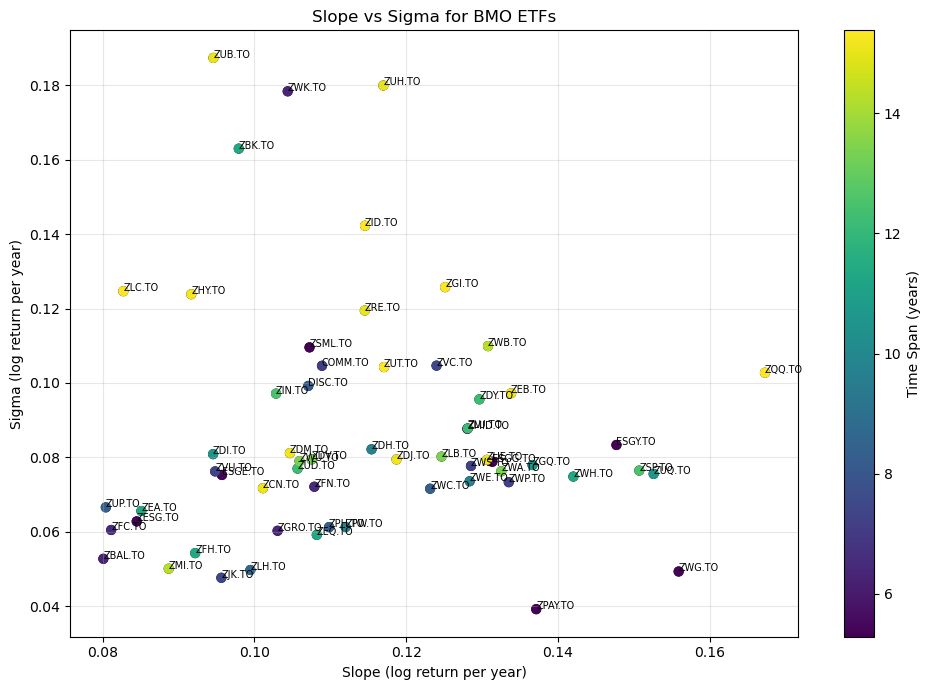

In [1]:
import numpy as np
from scipy.optimize import minimize
import bydoux_tools as bt
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

verbose = False  # Set to True for detailed output

# List of BMO ETF tickers (with some non-ETF entries, but filtered later)
tickers = [
    'ZGI', 'ZCN', 'STPL', 'ZIU', 'COMM', 'ZDM', 'DISC', 'ZEA', 'ZEO', 'ZEM',
    'ZGD', 'ZUE', 'ZJG', 'ZSP', 'ZEAT', 'ZSP.U', 'ZMT', 'ZDJ', 'ZQQ', 'ESGA',
    'ZNQ', 'ESGY', 'ZNQ.U', 'ESGE', 'ZMID.F', 'ESGG', 'ZMID', 'ZGRN', 'ZMID.U', 'ZCLN',
    'ZSML.F', 'ESGB', 'ZSML', 'ESGF', 'ZSML.U', 'ZJPN', 'ZJPN.F', 'ZCS', 'ZID', 'ZCS.L',
    'ZCH', 'ZCM', 'ZLC', 'ZLB', 'ZPS', 'ZLH', 'ZPS.L', 'ZLU', 'ZFS', 'ZLU.U',
    'ZFS.L', 'ZLD', 'ZMP', 'ZLI', 'ZPL', 'ZLE', 'ZFM', 'ZUQ.F', 'ZFL', 'ZUQ',
    'ZUQ.U', 'ZAG', 'ZGQ', 'ZSB', 'ZEQ', 'ZCB', 'ZDV', 'ZDB', 'ZUD', 'ZSDB',
    'ZDY', 'ZCDB', 'ZDY.U', 'ZMMK', 'ZDH', 'ZST', 'ZDI', 'ZST.L', 'ZVC', 'ZMBS',
    'ZVU', 'ZGB', 'ZRR', 'ZOCT', 'ZBI', 'ZJUL', 'ZBBB', 'ZAPR', 'ZQB', 'ZJAN',
    'ZUAG', 'ZWC', 'ZUAG.F', 'ZWS', 'ZUAG.U', 'ZWH', 'ZSU', 'ZWH.U', 'ZMU', 'ZWA',
    'ZIC', 'ZWE', 'ZIC.U', 'ZWP', 'ZUCM', 'ZWG', 'ZUCM.U', 'ZWB', 'ZUS.U', 'ZWB.U',
    'ZUS.V', 'ZWK', 'ZTS', 'ZWU', 'ZTS.U', 'ZWHC', 'ZTM', 'ZWEN', 'ZTM.U', 'ZWT',
    'ZTL.F', 'ZWQT', 'ZTL', 'ZPAY.F', 'ZTL.U', 'ZPAY', 'ZTIP', 'ZPAY.U', 'ZTIP.U', 'ZPH',
    'ZTIP.F', 'ZPW', 'ZJK', 'ZPW.U', 'ZHY', 'ZJK.U', 'ZEB', 'ZFH', 'ZUT', 'ZEF',
    'ZRE', 'ZIN', 'ZPR', 'ZUB', 'ZPR.U', 'ZBK', 'ZHP', 'ZUH', 'ZUP', 'ZHU',
    'ZUP.U', 'PAGE', 'Ticker', 'Date', 'ASSET', 'ZCON', 'ZBAL', 'ZGRO', 'ZEQT', 'ZESG',
    'ZBAL.T', 'ZGRO.T', 'ZMI', 'ACTIVE', 'ZLSC', 'ZLSU', 'ZZZD', 'ZACE', 'ARKK', 'ARKG',
    'ARKW', 'BGEQ', 'BGHC', 'BGIF', 'BGIN', 'BGDV', 'BGRT', 'GRNI', 'TOWR', 'WOMN',
    'ZGSB', 'ZMSB', 'ZCPB', 'ZFC', 'ZFN', 'ZXLE', 'ZXLU', 'ZXLK', 'ZXLB', 'ZXLP',
    'ZXLY', 'ZXLI', 'ZXLC', 'ZXLV', 'ZXLF', 'ZXLR', 'ZXLE.F', 'ZXLU.F', 'ZXLK.F', 'ZXLB.F',
    'ZXLP.F', 'ZXLY.F', 'ZXLI.F', 'ZXLC.F', 'ZXLV.F', 'ZXLF.F', 'ZXLR.F'
]
# Add .TO suffix for Yahoo Finance Canada tickers
tickers = np.array([ticker + '.TO' for ticker in tickers])

# Arrays to store results for each ticker
time_spans = np.zeros(len(tickers))  # Time span of data in years
slopes = np.zeros(len(tickers))      # Linear fit slope (log return per year)
sigmas = np.zeros(len(tickers))      # Standard deviation of residuals
q = np.zeros(len(tickers))           # Quality metric (slope/sigma)

for iticker, ticker in tqdm(enumerate(tickers),leave = False):
    bt.printc(f'{ticker}')
    try:
        tbl = bt.read_quotes(ticker)
    except Exception as e:
        if verbose:
            bt.printc(f"Exception for {ticker}: {e}")
        continue
    # Skip if table is None or empty
    if tbl is None or len(tbl) == 0 or ('mjd' not in tbl.colnames) or (len(tbl['mjd']) == 0):
        if verbose:
            bt.printc(f"Failed to read or empty data for {ticker}")
        continue

    # Convert MJD to years for fitting
    yr = tbl['mjd'] / 365
    val = tbl['log_close']

    # Linear fit to log price vs. time
    fit = np.polyfit(yr, val, 1)
    slopes[iticker] = fit[0]
    sigmas[iticker] = np.std(val - (fit[0] * yr + fit[1]))

    # Time span in years
    time_spans[iticker] = (tbl['mjd'][-1] - tbl['mjd'][0]) / 365

# Filter: keep only ETFs with enough data, reasonable slope, and nonzero sigma
keep = (sigmas != 0) & (time_spans > 5) & (slopes > 0.08) & (slopes < 0.25)
tickers = tickers[keep]
slopes = slopes[keep]
sigmas = sigmas[keep]
time_spans = time_spans[keep]

# Compute quality metric (Q = slope / sigma)
q = slopes / sigmas
ord = np.argsort(-q)  # Sort by descending Q

# Sort all arrays by Q
tickers = tickers[ord]
slopes = slopes[ord]
sigmas = sigmas[ord]
time_spans = time_spans[ord]
q = q[ord]

print('Best 20 ETFs by Q (slope/sigma):')
print('Ticker\tSlope\tSigma\tTime Span\tQ')
for iticker in range(min(20, len(tickers))):
    info = bt.get_info(tickers[iticker])
    if verbose:
        bt.printc('\t' + '\t'.join( info.get('longName', 'Unknown')))
        bt.printc(f"{tickers[iticker]} {slopes[iticker]*100:.1f} +- {sigmas[iticker]*100:.1f}%, dt = {time_spans[iticker]:.1f} yr, Q = {q[iticker]:.2f}")

# --- Visualization ---

# Normalize the color map to the range of time_spans
norm = mcolors.Normalize(vmin=np.min(time_spans), vmax=np.max(time_spans))
cmap = plt.colormaps['viridis']

plt.figure(figsize=(10, 7))
# Scatter plot: slope vs sigma, colored by time span
sc = plt.scatter(slopes, sigmas, c=time_spans, cmap=cmap, norm=norm, s=40, edgecolor='k')

# Highlight ETFs with "good" slope and time span
g = (slopes > 0.08) & (slopes < 0.25) & (time_spans > 3)
plt.scatter(slopes[g], sigmas[g], c=time_spans[g], cmap=cmap, norm=norm, s=40)

# Annotate each point with the ticker symbol
for iticker in range(len(tickers)):
    plt.text(slopes[iticker], sigmas[iticker], tickers[iticker], fontsize=7)

plt.xlabel('Slope (log return per year)')
plt.ylabel('Sigma (log return per year)')
plt.grid(True, alpha=0.3)
plt.title('Slope vs Sigma for BMO ETFs')

# Add colorbar for time span
cbar = plt.colorbar(sc)
cbar.set_label('Time Span (years)')

plt.tight_layout()
plt.show()